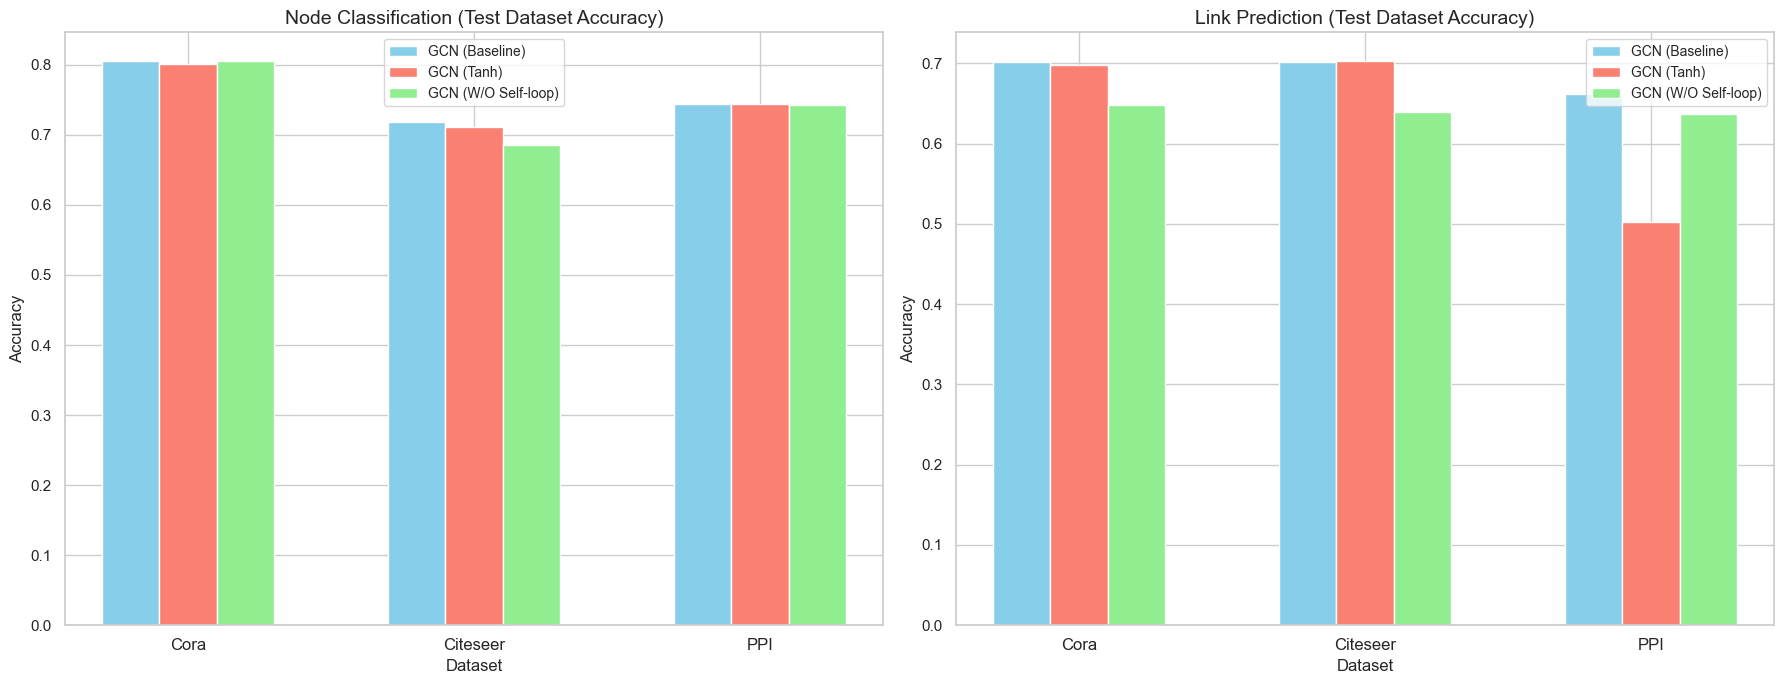

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define methods and datasets
methods = ['GCN (Baseline)', 'GCN (Tanh)', 'GCN (W/O Self-loop)']
datasets = ['Cora', 'Citeseer', 'PPI']

# Node Classification Accuracy Data
node_classification_accuracy = {
    'Cora': [0.806, 0.801, 0.806],
    'Citeseer': [0.718, 0.711, 0.686],
    'PPI': [0.7436, 0.7438, 0.7429]
}

# Link Prediction Accuracy Data
link_prediction_accuracy = {
    'Cora': [0.7021, 0.6973, 0.6480],
    'Citeseer': [0.7011, 0.7033, 0.6396],
    'PPI': [0.6615, 0.5028, 0.6364]
}

# Number of methods and datasets
n_methods = len(methods)
n_datasets = len(datasets)

# Set bar width
bar_width = 0.2
index = np.arange(n_datasets)

# Assign colors to different methods
colors = ['skyblue', 'salmon', 'lightgreen']

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot Node Classification Bar Chart
for i, method in enumerate(methods):
    accuracies = [node_classification_accuracy[dataset][i] for dataset in datasets]
    axes[0].bar(index + i * bar_width, accuracies, bar_width, label=method, color=colors[i])

axes[0].set_xlabel('Dataset', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Node Classification (Test Dataset Accuracy)', fontsize=14)
# Set x-axis tick positions and labels
axes[0].set_xticks(index + (n_methods - 1) * bar_width / 2)
axes[0].set_xticklabels(datasets, fontsize=12)
axes[0].legend(fontsize=10)

# Plot Link Prediction Bar Chart
for i, method in enumerate(methods):
    accuracies = [link_prediction_accuracy[dataset][i] for dataset in datasets]
    axes[1].bar(index + i * bar_width, accuracies, bar_width, label=method, color=colors[i])

axes[1].set_xlabel('Dataset', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Link Prediction (Test Dataset Accuracy)', fontsize=14)
# Set x-axis tick positions and labels
axes[1].set_xticks(index + (n_methods - 1) * bar_width / 2)
axes[1].set_xticklabels(datasets, fontsize=12)
axes[1].legend(fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


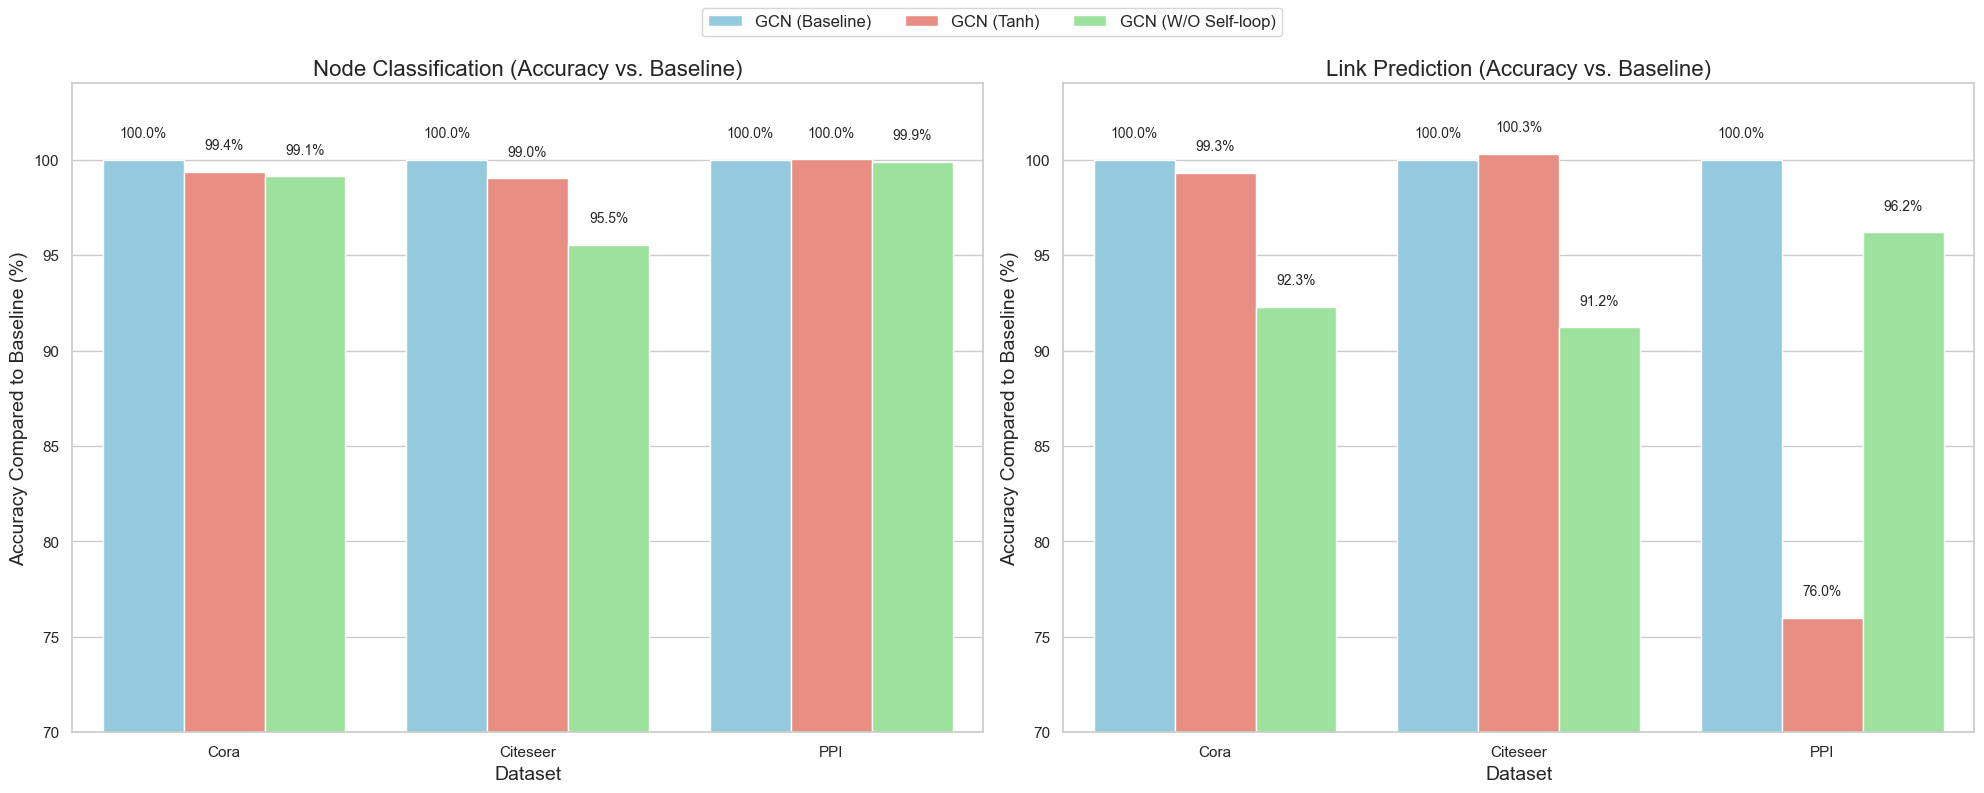

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define methods and datasets
methods = ['GCN (Baseline)', 'GCN (Tanh)', 'GCN (W/O Self-loop)']
datasets = ['Cora', 'Citeseer', 'PPI']
colors = ['skyblue', 'salmon', 'lightgreen']

# New Node Classification Accuracy Data
node_classification_accuracy = {
    'Cora': [0.806, 0.801, 0.799],
    'Citeseer': [0.718, 0.711, 0.686],
    'PPI': [0.7436, 0.7438, 0.7429]
}

# New Link Prediction Accuracy Data
link_prediction_accuracy = {
    'Cora': [0.7021, 0.6973, 0.6480],
    'Citeseer': [0.7011, 0.7033, 0.6396],
    'PPI': [0.6615, 0.5028, 0.6364]
}

# Function to calculate percentage compared to baseline and prepare DataFrame
def prepare_percentage_df(data):
    records = []
    for dataset in datasets:
        baseline = data[dataset][0]
        records.append({'Method': methods[0], 'Dataset': dataset, 'Percentage': 100.0})  # Baseline
        for i in range(1, len(methods)):
            percent = (data[dataset][i] / baseline) * 100
            records.append({'Method': methods[i], 'Dataset': dataset, 'Percentage': percent})
    df = pd.DataFrame(records)
    return df

# Prepare DataFrames
df_node = prepare_percentage_df(node_classification_accuracy)
df_link = prepare_percentage_df(link_prediction_accuracy)

# Set Seaborn style
sns.set(style="whitegrid")

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Function to plot with Seaborn
def plot_seaborn_bar(ax, df, title, limits=(70, 104)):
    sns.barplot(x='Dataset', y='Percentage', hue='Method', data=df, ax=ax, palette=colors)
    
    # Annotate bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height + 1), 
                    ha='center', va='bottom', fontsize=10)
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Dataset', fontsize=14)
    ax.set_ylabel('Accuracy Compared to Baseline (%)', fontsize=14)
    ax.set_ylim(limits[0],limits[1])  # Adjust y-axis limit to accommodate annotations

# Plot Node Classification Percentage Bar Chart
plot_seaborn_bar(axes[0], df_node, 'Node Classification (Accuracy vs. Baseline)')

# Plot Link Prediction Percentage Bar Chart
plot_seaborn_bar(axes[1], df_link, 'Link Prediction (Accuracy vs. Baseline)')

# Adjust legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=12)

# Remove individual legends from subplots
axes[0].get_legend().remove()
axes[1].get_legend().remove()

# Adjust layout to accommodate the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


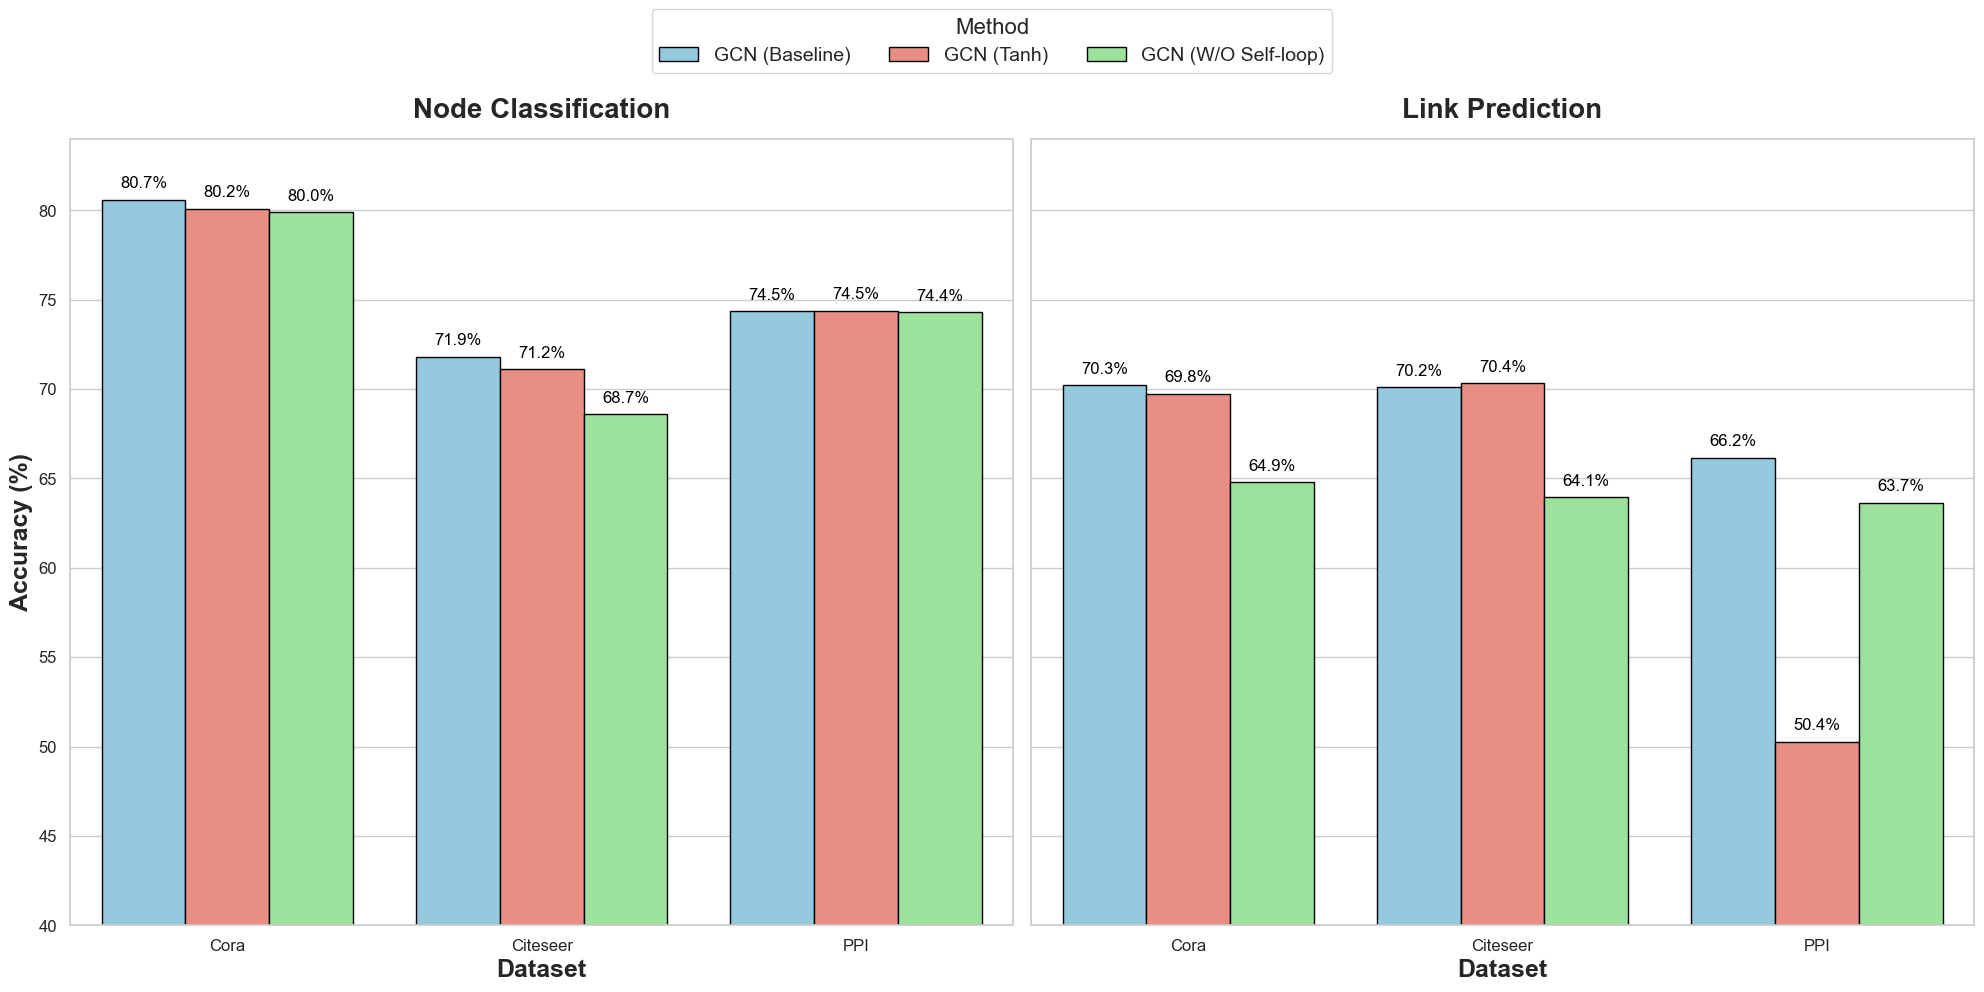

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##############################################################################
# 1) Data Preparation
##############################################################################

# Define methods and datasets
methods = ['GCN (Baseline)', 'GCN (Tanh)', 'GCN (W/O Self-loop)']
datasets = ['Cora', 'Citeseer', 'PPI']
colors = ['skyblue', 'salmon', 'lightgreen']

# Node Classification Accuracy Data
node_classification_accuracy = {
    'Cora': [0.806, 0.801, 0.799],
    'Citeseer': [0.718, 0.711, 0.686],
    'PPI': [0.7436, 0.7438, 0.7429]
}

# Link Prediction Accuracy Data
link_prediction_accuracy = {
    'Cora': [0.7021, 0.6973, 0.6480],
    'Citeseer': [0.7011, 0.7033, 0.6396],
    'PPI': [0.6615, 0.5028, 0.6364]
}

def prepare_percentage_df(data, datasets, methods):
    """
    Convert raw accuracy data to percentage relative to the baseline.

    Parameters:
    - data (dict): Dictionary containing accuracy data.
    - datasets (list): List of dataset names.
    - methods (list): List of method names.

    Returns:
    - pd.DataFrame: Melted DataFrame with percentage accuracies.
    """
    records = []
    for dataset in datasets:
        baseline = data[dataset][0]
        records.append({'Method': methods[0], 'Dataset': dataset, 'Percentage': 100.0})  # Baseline
        for i in range(1, len(methods)):
            percent = (data[dataset][i] / baseline) * 100
            records.append({'Method': methods[i], 'Dataset': dataset, 'Percentage': percent})
    df = pd.DataFrame(records)
    return df

def prepare_accuracy_df(data, datasets, methods):
    """
    Prepare a DataFrame for plotting accuracy data.

    Parameters:
    - data (dict): Dictionary containing accuracy data.
    - datasets (list): List of dataset names.
    - methods (list): List of method names.

    Returns:
    - pd.DataFrame: Melted DataFrame with accuracy values.
    """
    records = []
    for dataset in datasets:
        for i, method in enumerate(methods):
            accuracy = data[dataset][i]*100
            records.append({'Method': method, 'Dataset': dataset, 'Accuracy': accuracy})
    df = pd.DataFrame(records)
    return df

# Prepare DataFrames
# df_node = prepare_percentage_df(node_classification_accuracy, datasets, methods)
# df_link = prepare_percentage_df(link_prediction_accuracy, datasets, methods)
df_node = prepare_accuracy_df(node_classification_accuracy, datasets, methods)
df_link = prepare_accuracy_df(link_prediction_accuracy, datasets, methods)

##############################################################################
# 2) Plotting Configuration
##############################################################################

# Set Seaborn style for aesthetics
sns.set(style="whitegrid", palette="pastel")

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

def plot_seaborn_bar(ax, df, title, colors, limits=(70, 110)):
    """
    Plot a seaborn bar chart with annotations.

    Parameters:
    - ax (matplotlib.axes.Axes): The axes to plot on.
    - df (pd.DataFrame): DataFrame containing the data.
    - title (str): Title of the subplot.
    - colors (list): List of colors for the bars.
    - limits (tuple): Y-axis limits.
    """
    sns.barplot(
        x='Dataset',
        # y='Percentage',
        y='Accuracy',
        hue='Method',
        data=df,
        ax=ax,
        palette=colors,
        edgecolor='black',
        linewidth=1
    )
    
    # Set titles and labels with increased font sizes
    ax.set_title(title, fontsize=20, weight='bold', pad=15)
    ax.set_xlabel('Dataset', fontsize=18, weight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=18, weight='bold')
    
    # Set y-axis limits
    ax.set_ylim(limits)
    
    # Add annotations on top of the bars
    for p in ax.patches:
        height = p.get_height()+0.1
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')
    
    # Customize tick parameters
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Remove the legend from individual subplots
    ax.legend_.remove()

# Plot Node Classification Percentage Bar Chart
plot_seaborn_bar(
    ax=axes[0],
    df=df_node,
    title='Node Classification',
    colors=colors,
    limits=(40, 84)
)

# Plot Link Prediction Percentage Bar Chart
plot_seaborn_bar(
    ax=axes[1],
    df=df_link,
    title='Link Prediction',
    colors=colors,
    limits=(40, 84)
)

# Adjust the overall legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=14, title='Method', title_fontsize=16)

# Improve layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.92])

# Display the plot
plt.show()


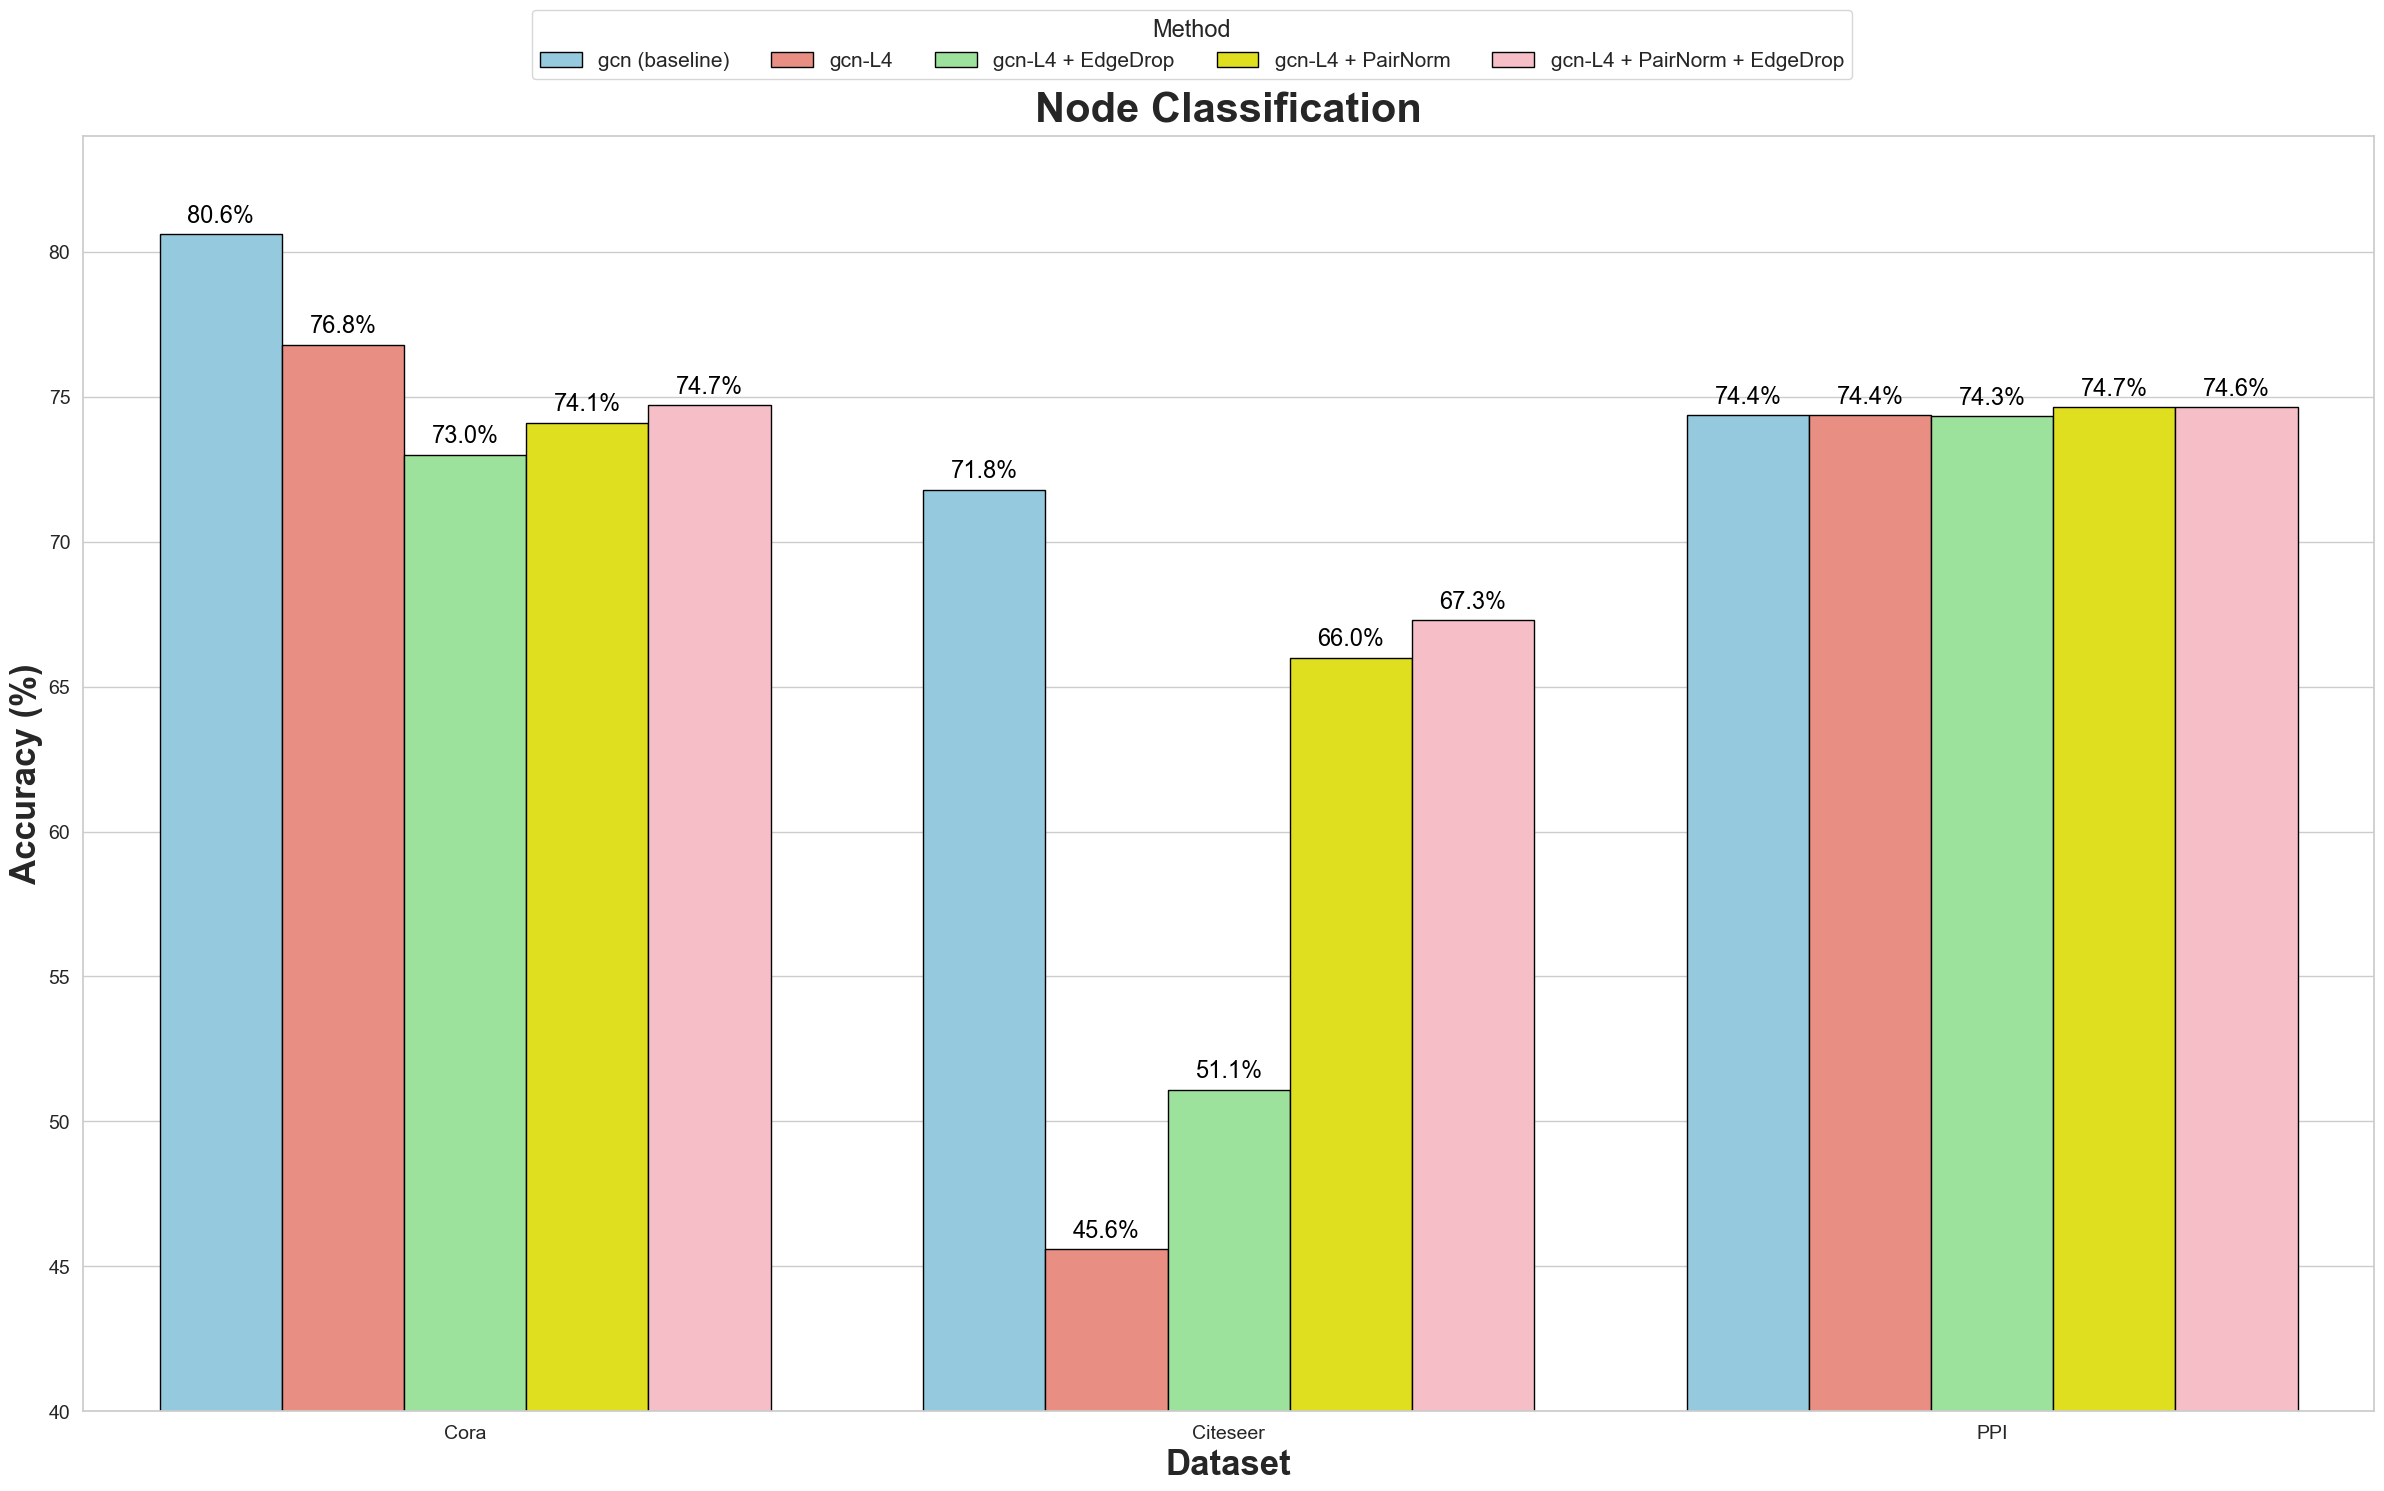

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##############################################################################
# 1) Data Preparation
##############################################################################

# Define methods and datasets
methods = [
    "gcn (baseline)",
    "gcn-L4",
    "gcn-L4 + EdgeDrop",
    "gcn-L4 + PairNorm",
    "gcn-L4 + PairNorm + EdgeDrop"
]
datasets = ['Cora', 'Citeseer', 'PPI']

# Updated colors list to match the number of methods
colors = ['skyblue', 'salmon', 'lightgreen','yellow','lightpink']
# Node Classification Accuracy Data (fractional values)
node_classification_accuracy = {
    'Cora': [0.806, 0.768, 0.73, 0.741, 0.747],
    'Citeseer': [0.718, 0.456, 0.511, 0.66, 0.673],
    'PPI': [0.7436, 0.7436, 0.7433, 0.7465, 0.7464]
}

def prepare_accuracy_df(data, datasets, methods):
    """
    Prepare a DataFrame for plotting accuracy data.

    Parameters:
    - data (dict): Dictionary containing accuracy data.
    - datasets (list): List of dataset names.
    - methods (list): List of method names.

    Returns:
    - pd.DataFrame: Melted DataFrame with accuracy values.
    """
    records = []
    for dataset in datasets:
        for i, method in enumerate(methods):
            accuracy = data[dataset][i] * 100  # Convert to percentage
            records.append({'Method': method, 'Dataset': dataset, 'Accuracy': accuracy})
    df = pd.DataFrame(records)
    return df

# Prepare DataFrames
df_node = prepare_accuracy_df(node_classification_accuracy, datasets, methods)

##############################################################################
# 2) Plotting Configuration
##############################################################################

# Set Seaborn style for aesthetics
sns.set(style="whitegrid", palette="pastel")

# Create two subplots side by side
fig, axes = plt.subplots(figsize=(24, 15), sharey=False)

def plot_seaborn_bar(ax, df, title, colors, limits=(40, 84)):
    """
    Plot a seaborn bar chart with annotations.

    Parameters:
    - ax (matplotlib.axes.Axes): The axes to plot on.
    - df (pd.DataFrame): DataFrame containing the data.
    - title (str): Title of the subplot.
    - colors (list): List of colors for the bars.
    - limits (tuple): Y-axis limits.
    """
    sns.barplot(
        x='Dataset',
        y='Accuracy',
        hue='Method',
        data=df,
        ax=ax,
        palette=colors,
        edgecolor='black',
        linewidth=1
    )
    
    # Set titles and labels with increased font sizes
    ax.set_title(title, fontsize=30, weight='bold', pad=10)
    ax.set_xlabel('Dataset', fontsize=25, weight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=25, weight='bold')
    
    # Set y-axis limits
    ax.set_ylim(limits)
    
    # Add annotations on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='bottom',
                    fontsize=17,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')
    
    # Customize tick parameters
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    # Remove the legend from individual subplots
    ax.legend_.remove()

# Plot Node Classification Accuracy Bar Chart
plot_seaborn_bar(
    ax=axes,
    df=df_node,
    title='Node Classification',
    colors=colors,
    limits=(40, 84)  # Adjusted to accommodate accuracies up to ~80%
)

# Adjust the overall legend
handles, labels = axes.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=15, title='Method', title_fontsize=17, loc='upper center', ncol=5)

# Improve layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()


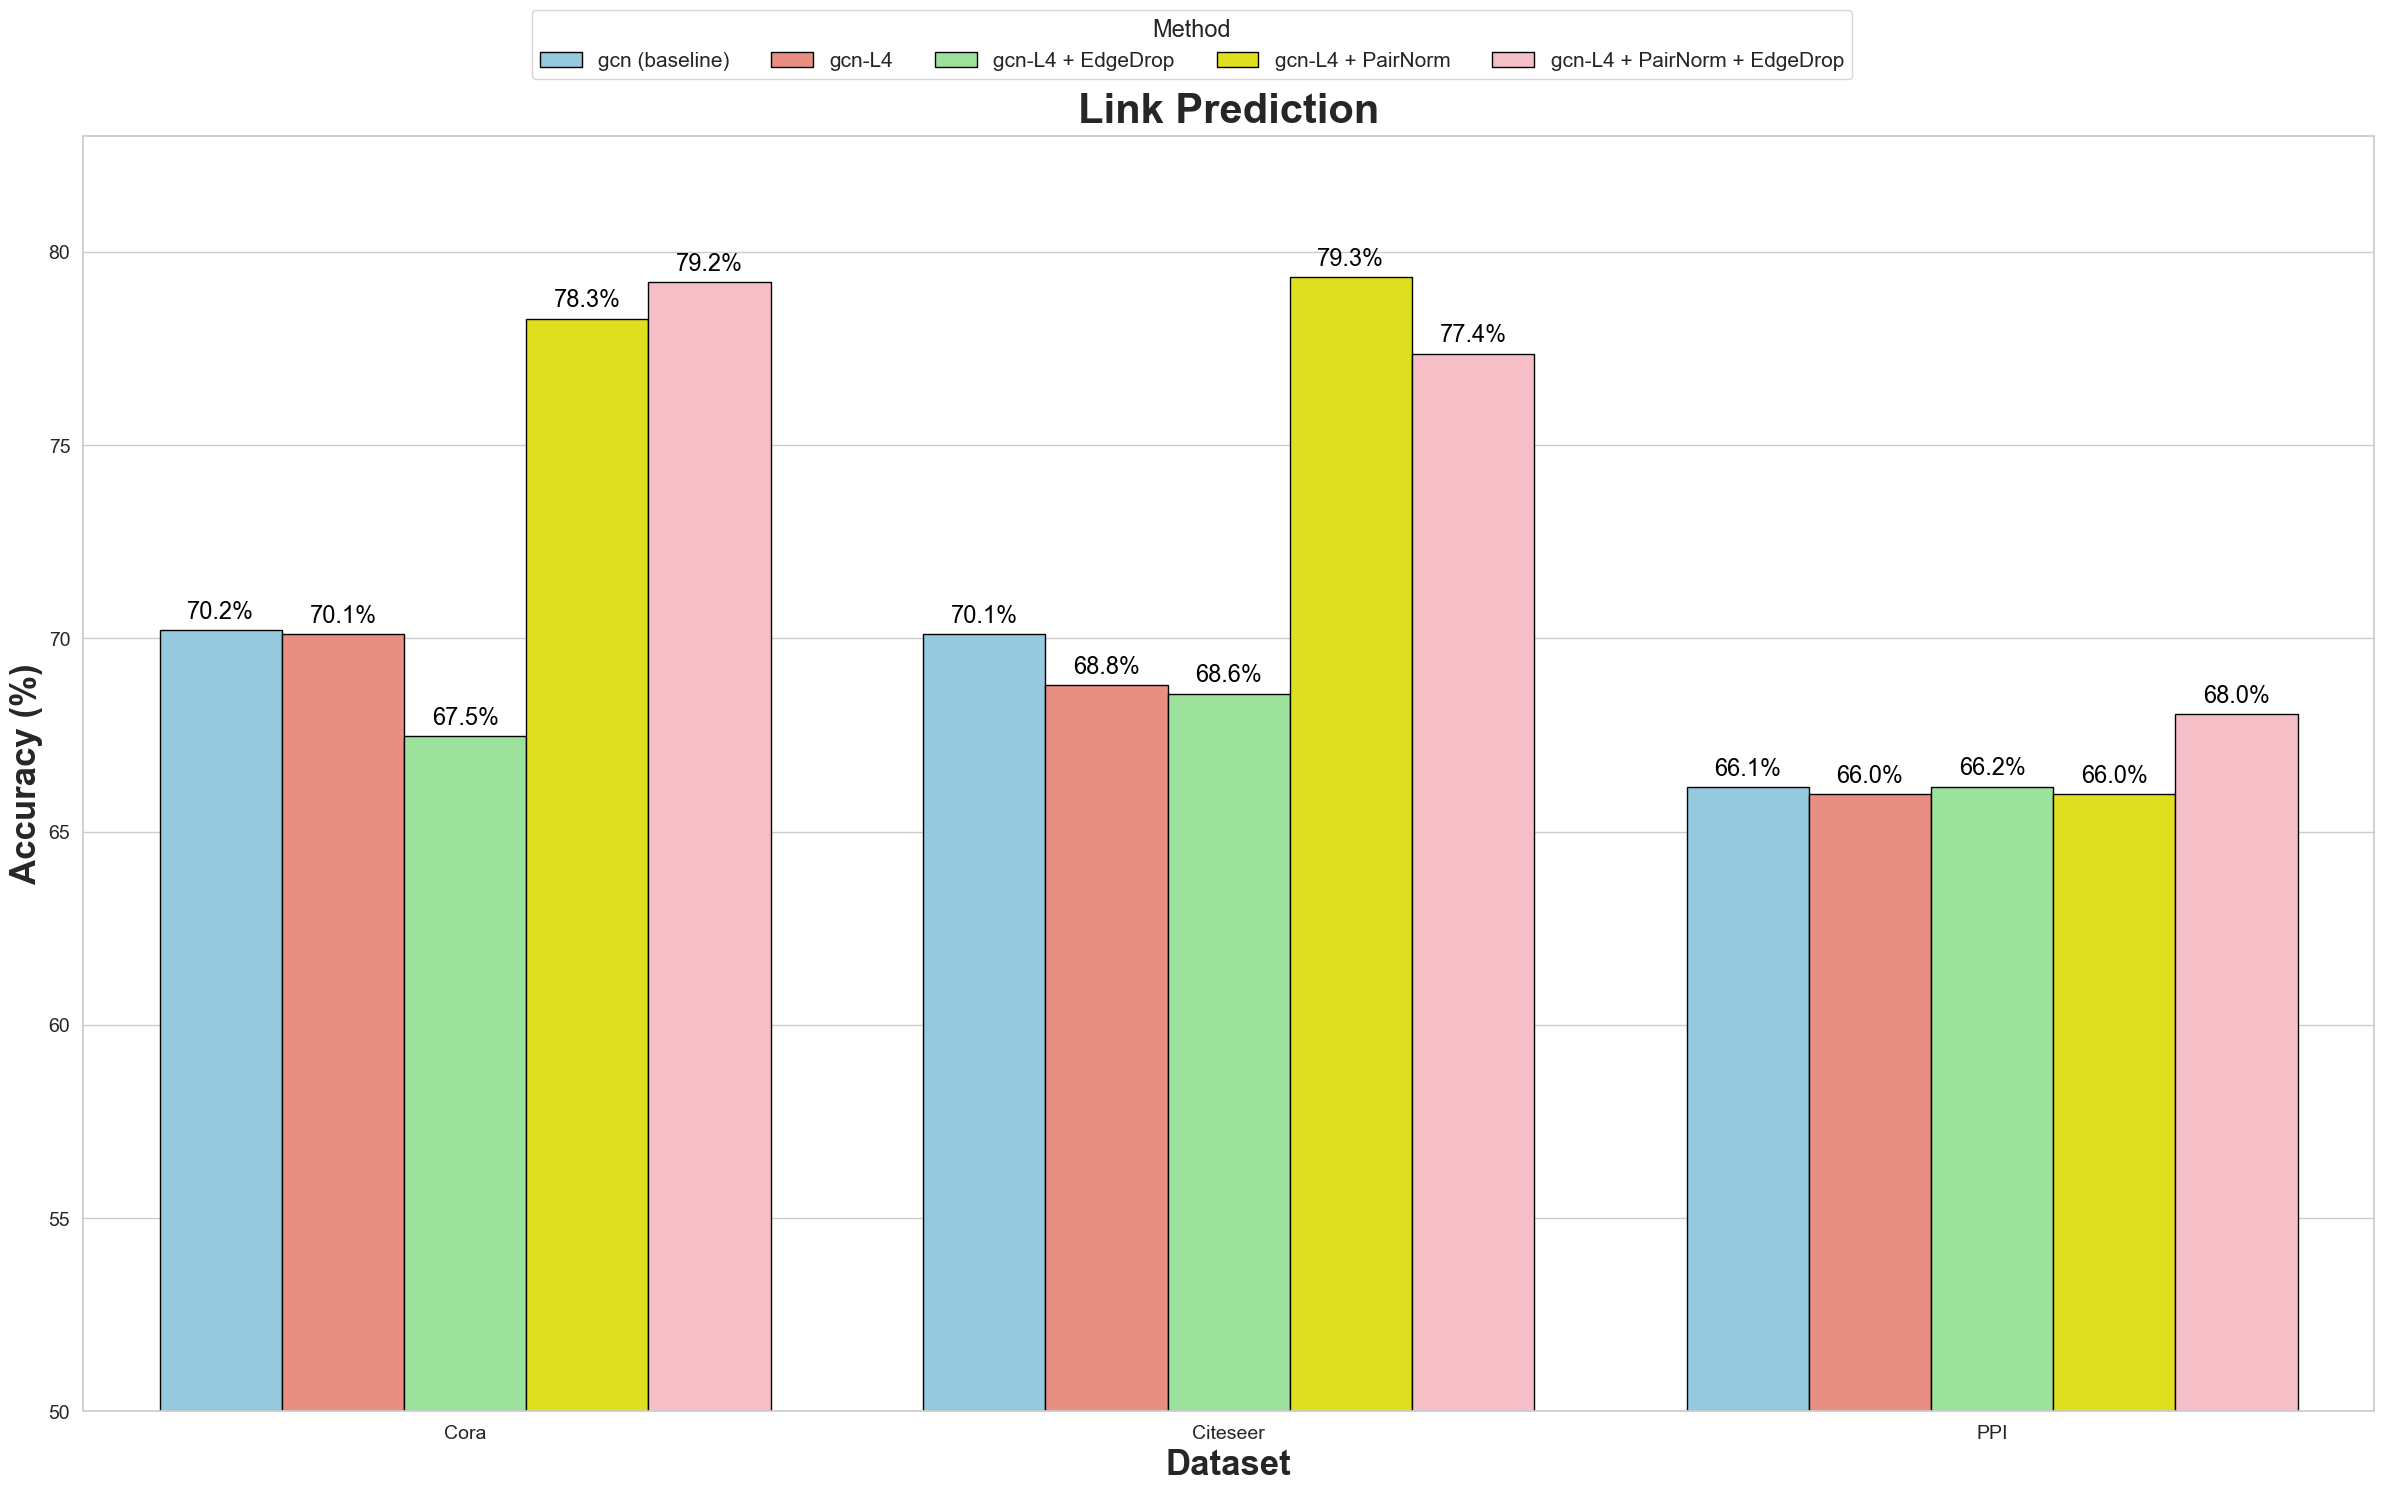

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##############################################################################
# 1) Data Preparation
##############################################################################

# Define methods and datasets
methods = [
    "gcn (baseline)",
    "gcn-L4",
    "gcn-L4 + EdgeDrop",
    "gcn-L4 + PairNorm",
    "gcn-L4 + PairNorm + EdgeDrop"
]
datasets = ['Cora', 'Citeseer', 'PPI']

# Updated colors list to match the number of methods
colors = ['skyblue', 'salmon', 'lightgreen','yellow','lightpink']
# Node Classification Accuracy Data (fractional values)
link_prediction_accuracy = {
    'Cora': [0.7021, 0.7011, 0.6746, 0.7827, 0.7922],
    'Citeseer': [0.7011, 0.6879, 0.6857, 0.7934, 0.7736],
    'PPI': [0.6615, 0.6597, 0.6616, 0.6596, 0.6804]
}


def prepare_accuracy_df(data, datasets, methods):
    """
    Prepare a DataFrame for plotting accuracy data.

    Parameters:
    - data (dict): Dictionary containing accuracy data.
    - datasets (list): List of dataset names.
    - methods (list): List of method names.

    Returns:
    - pd.DataFrame: Melted DataFrame with accuracy values.
    """
    records = []
    for dataset in datasets:
        for i, method in enumerate(methods):
            accuracy = data[dataset][i] * 100  # Convert to percentage
            records.append({'Method': method, 'Dataset': dataset, 'Accuracy': accuracy})
    df = pd.DataFrame(records)
    return df

# Prepare DataFrames
df_link = prepare_accuracy_df(link_prediction_accuracy, datasets, methods)

##############################################################################
# 2) Plotting Configuration
##############################################################################

# Set Seaborn style for aesthetics
sns.set(style="whitegrid", palette="pastel")

# Create two subplots side by side
fig, axes = plt.subplots(figsize=(24, 15), sharey=False)

def plot_seaborn_bar(ax, df, title, colors, limits=(40, 84)):
    """
    Plot a seaborn bar chart with annotations.

    Parameters:
    - ax (matplotlib.axes.Axes): The axes to plot on.
    - df (pd.DataFrame): DataFrame containing the data.
    - title (str): Title of the subplot.
    - colors (list): List of colors for the bars.
    - limits (tuple): Y-axis limits.
    """
    sns.barplot(
        x='Dataset',
        y='Accuracy',
        hue='Method',
        data=df,
        ax=ax,
        palette=colors,
        edgecolor='black',
        linewidth=1
    )
    
    # Set titles and labels with increased font sizes
    ax.set_title(title, fontsize=30, weight='bold', pad=10)
    ax.set_xlabel('Dataset', fontsize=25, weight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=25, weight='bold')
    
    # Set y-axis limits
    ax.set_ylim(limits)
    
    # Add annotations on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='bottom',
                    fontsize=17,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')
    
    # Customize tick parameters
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    # Remove the legend from individual subplots
    ax.legend_.remove()

# Plot Node Classification Accuracy Bar Chart
plot_seaborn_bar(
    ax=axes,
    df=df_link,
    title='Link Prediction',
    colors=colors,
    limits=(50, 83)  # Adjusted to accommodate accuracies up to ~80%
)

# Adjust the overall legend
handles, labels = axes.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=15, title='Method', title_fontsize=17, loc='upper center', ncol=5)

# Improve layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# 加载CSV文件


def get_sv(root, filename):
    train_file = filename + '_train.csv'
    val_file = filename + '_val.csv'
    train_file = os.path.join(root, train_file)
    val_file = os.path.join(root, val_file)
    df_train = pd.read_csv(train_file)
    df_val = pd.read_csv(val_file)
    return df_train, df_val

def moving_average(data, window_size=5):
    return data.rolling(window=window_size, min_periods=1).mean()


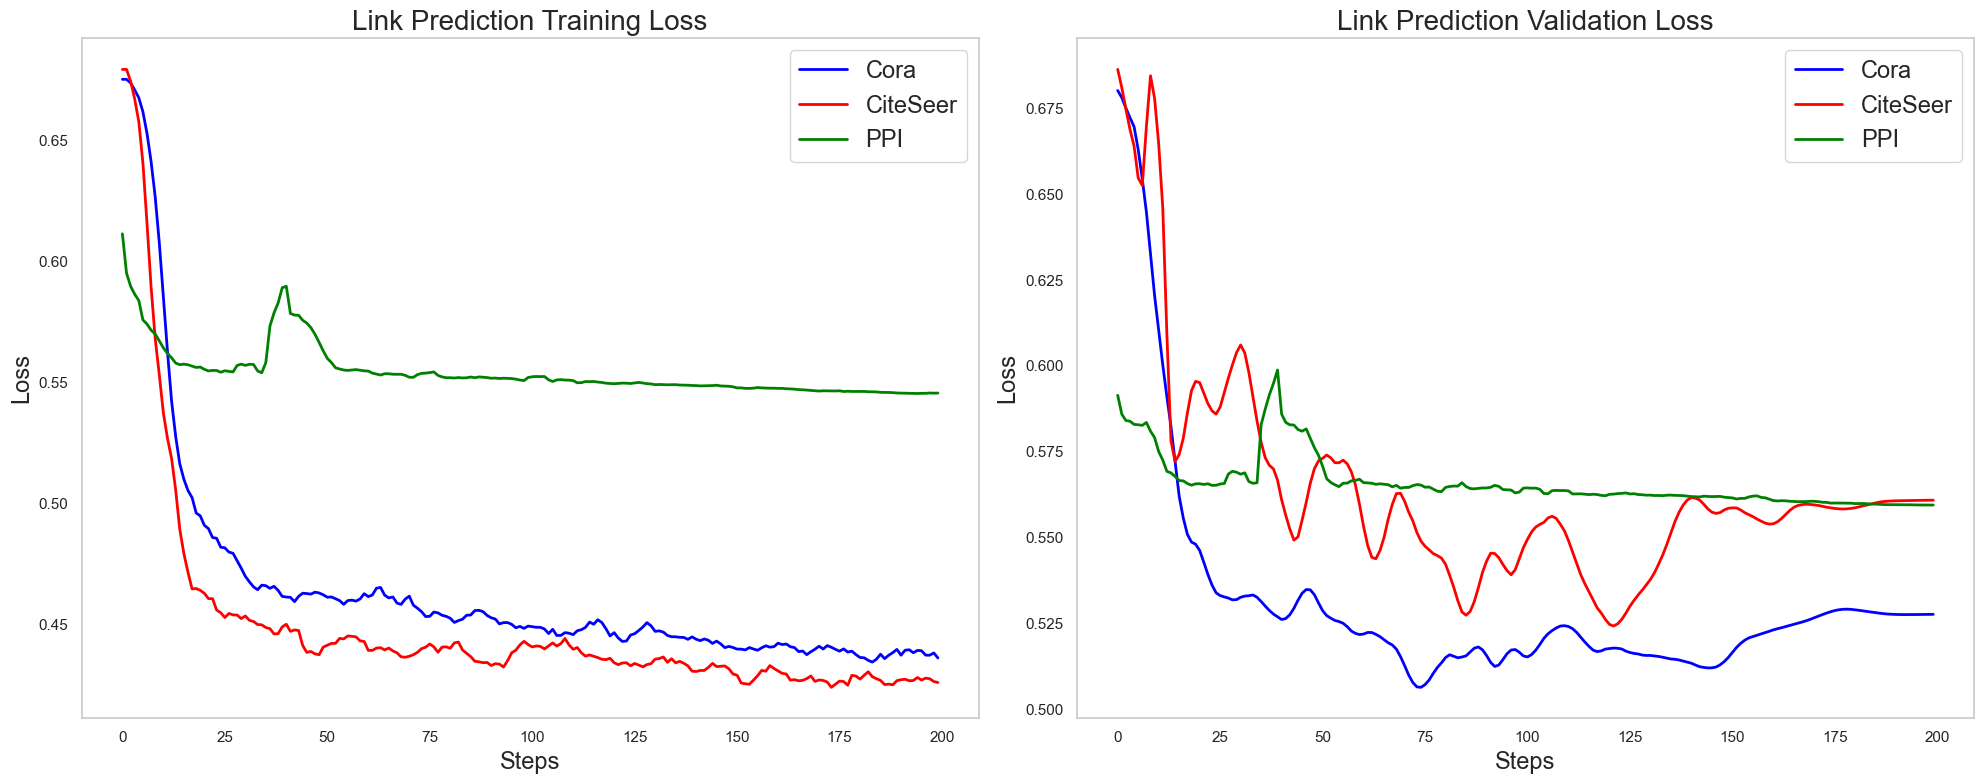

In [146]:
models = [
    "link-pred_cora",
    "link-pred_citeseer",
    "link-pred_ppi",
]
labels = [
    "Cora",
    "CiteSeer",
    "PPI",
]
colors = [
    'blue',
    'red',
    'green',
]
root = '../outputs/'
train_data = {}
val_data = {}
for model, label in zip(models, labels):
    train_data[label], val_data[label] = get_sv(root, model)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].set_title('Link Prediction Training Loss', fontsize=20)
for i,model in enumerate(labels):
    smoothed_data = moving_average(train_data[model]['Value'], window_size=5)
    num = len(smoothed_data)
    steps = np.arange(min(num, 200))
    values = smoothed_data[:200]
    axes[0].plot(steps, values, label=model, linewidth=2, color=colors[i])
axes[0].set_xlabel('Steps', fontsize=17)
axes[0].set_ylabel('Loss', fontsize=17)
axes[0].legend(fontsize=17)
axes[0].grid()

axes[1].set_title('Link Prediction Validation Loss', fontsize=20)
for i,model in enumerate(labels):
    smoothed_data = moving_average(val_data[model]['Value'], window_size=5)
    num = len(smoothed_data)
    steps = np.arange(min(num, 200))
    values = smoothed_data[:200]
    axes[1].plot(steps, values, label=model, linewidth=2, color=colors[i])
axes[1].set_xlabel('Steps', fontsize=17)
axes[1].set_ylabel('Loss', fontsize=17)
axes[1].legend(fontsize=17)
axes[1].grid()

fig.tight_layout()

plt.show()

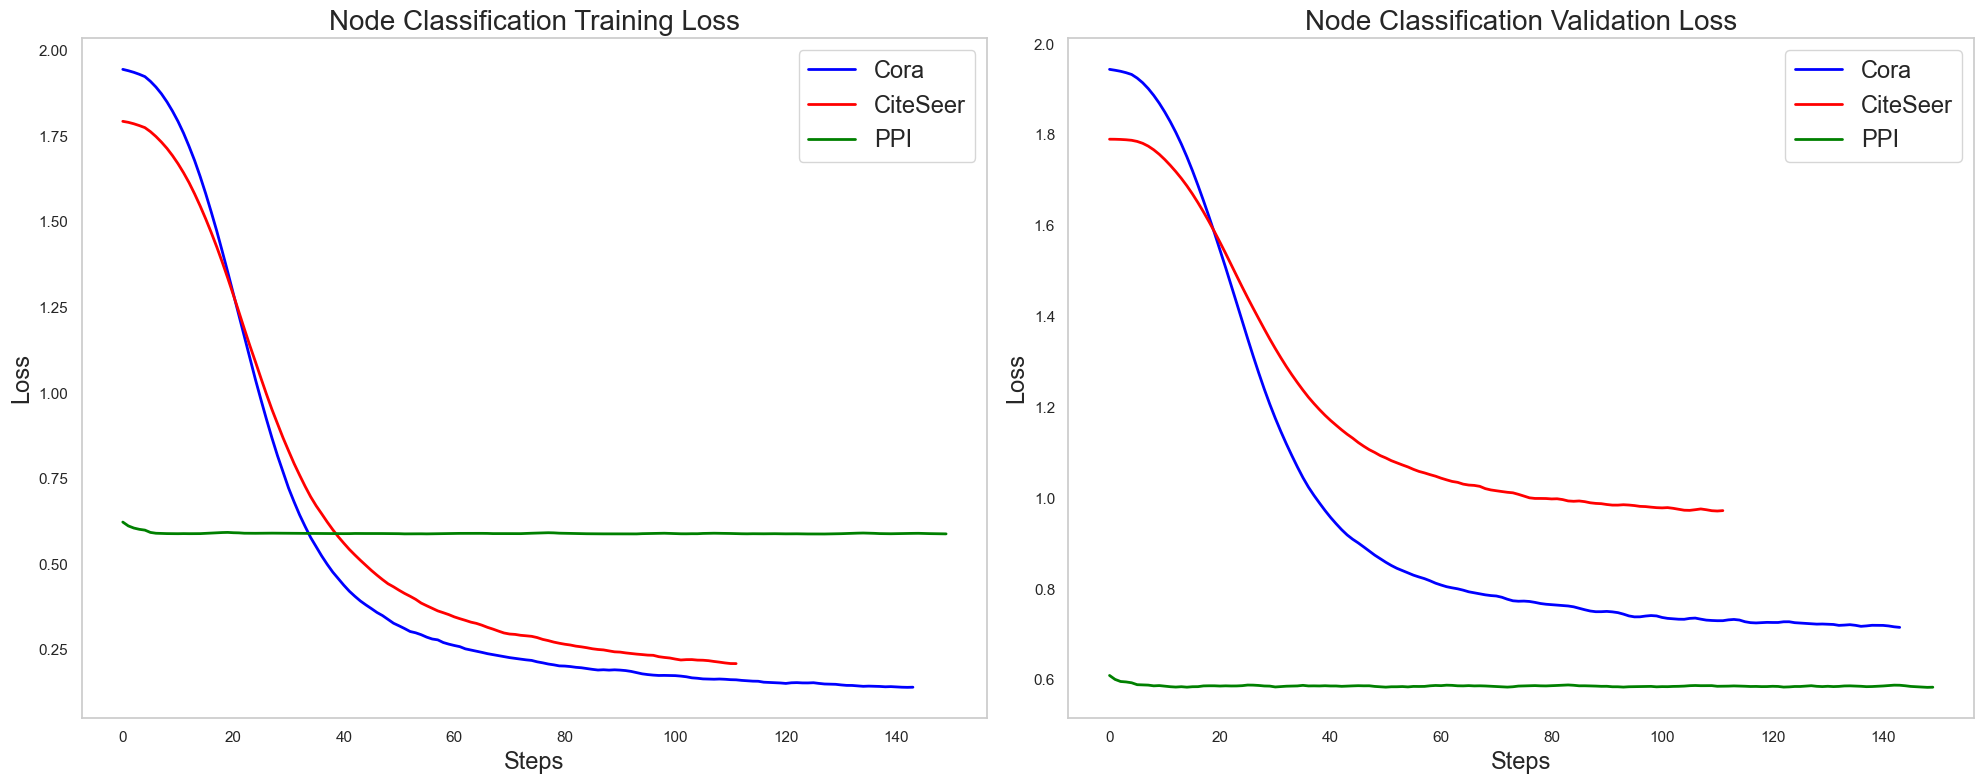

In [148]:
models = [
    "node-cls_cora",
    "node-cls_citeseer",
    "node-cls_ppi",
]
labels = [
    "Cora",
    "CiteSeer",
    "PPI",
]
colors = [
    'blue',
    'red',
    'green',
]
root = '../outputs/'
train_data = {}
val_data = {}
for model, label in zip(models, labels):
    train_data[label], val_data[label] = get_sv(root, model)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].set_title('Node Classification Training Loss', fontsize=20)
for i,model in enumerate(labels):
    smoothed_data = moving_average(train_data[model]['Value'], window_size=5)
    num = len(smoothed_data)
    steps = np.arange(min(num, 150))
    values = smoothed_data[:150]
    axes[0].plot(steps, values, label=model, linewidth=2, color=colors[i])
axes[0].set_xlabel('Steps', fontsize=17)
axes[0].set_ylabel('Loss', fontsize=17)
axes[0].legend(fontsize=17)
axes[0].grid()

axes[1].set_title('Node Classification Validation Loss', fontsize=20)
for i,model in enumerate(labels):
    smoothed_data = moving_average(val_data[model]['Value'], window_size=5)
    num = len(smoothed_data)
    steps = np.arange(min(num,150))
    values = smoothed_data[:150]
    axes[1].plot(steps, values, label=model, linewidth=2, color=colors[i])

axes[1].set_xlabel('Steps', fontsize=17)
axes[1].set_ylabel('Loss', fontsize=17)
axes[1].legend(fontsize=17)
axes[1].grid()

fig.tight_layout()

plt.show()